In [1]:
import pandas as pd

# Load the dataset
file_path = "Unemployment in India (1).csv"
df = pd.read_csv(file_path)

# Check column names, datatypes, and null values
column_info = df.info()
null_values = df.isnull().sum()
preview_rows = df.head()

column_info, null_values, preview_rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


(None,
 Region                                      28
  Date                                       28
  Frequency                                  28
  Estimated Unemployment Rate (%)            28
  Estimated Employed                         28
  Estimated Labour Participation Rate (%)    28
 Area                                        28
 dtype: int64,
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
 1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
 2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
 3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
 4  Andhra Pradesh   30-09-2019    Monthly                              5.17   
 
     Estimated Employed   Estimated Labour Participation Rate (%)   Area  
 0           11999139.0                                     43.24  Rural  
 1        

In [13]:
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Drop rows with missing values (create a clean copy)
df_cleaned = df.dropna().copy()

# Convert 'Date' to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], dayfirst=True)

# Clean the Frequency column safely using .loc
df_cleaned.loc[:, 'Frequency'] = df_cleaned['Frequency'].str.strip()

# Re-check the cleaned data
cleaned_info = df_cleaned.info()
cleaned_preview = df_cleaned.head()

cleaned_info, cleaned_preview


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated_Unemployment_Rate_(%)          740 non-null    float64       
 4   Estimated_Employed                       740 non-null    float64       
 5   Estimated_Labour_Participation_Rate_(%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


(None,
            Region       Date Frequency  Estimated_Unemployment_Rate_(%)  \
 0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
 1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
 2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
 3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
 4  Andhra Pradesh 2019-09-30   Monthly                             5.17   
 
    Estimated_Employed  Estimated_Labour_Participation_Rate_(%)   Area  
 0          11999139.0                                    43.24  Rural  
 1          11755881.0                                    42.05  Rural  
 2          12086707.0                                    43.50  Rural  
 3          12285693.0                                    43.97  Rural  
 4          12256762.0                                    44.68  Rural  )

In [5]:
# Check unique values in categorical columns: Region, Frequency, Area
unique_regions = df_cleaned['Region'].unique()
unique_frequencies = df_cleaned['Frequency'].unique()
unique_areas = df_cleaned['Area'].unique()

# Count of unique values
region_count = df_cleaned['Region'].nunique()
frequency_count = df_cleaned['Frequency'].nunique()
area_count = df_cleaned['Area'].nunique()

{
    "Unique Regions (States)": unique_regions,
    "Number of Regions": region_count,
    "Unique Frequencies": unique_frequencies,
    "Number of Frequencies": frequency_count,
    "Unique Areas": unique_areas,
    "Number of Areas": area_count
}


{'Unique Regions (States)': array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
        'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
        'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
        'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
        'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
        'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
       dtype=object),
 'Number of Regions': 28,
 'Unique Frequencies': array([' Monthly', 'Monthly'], dtype=object),
 'Number of Frequencies': 2,
 'Unique Areas': array(['Rural', 'Urban'], dtype=object),
 'Number of Areas': 2}

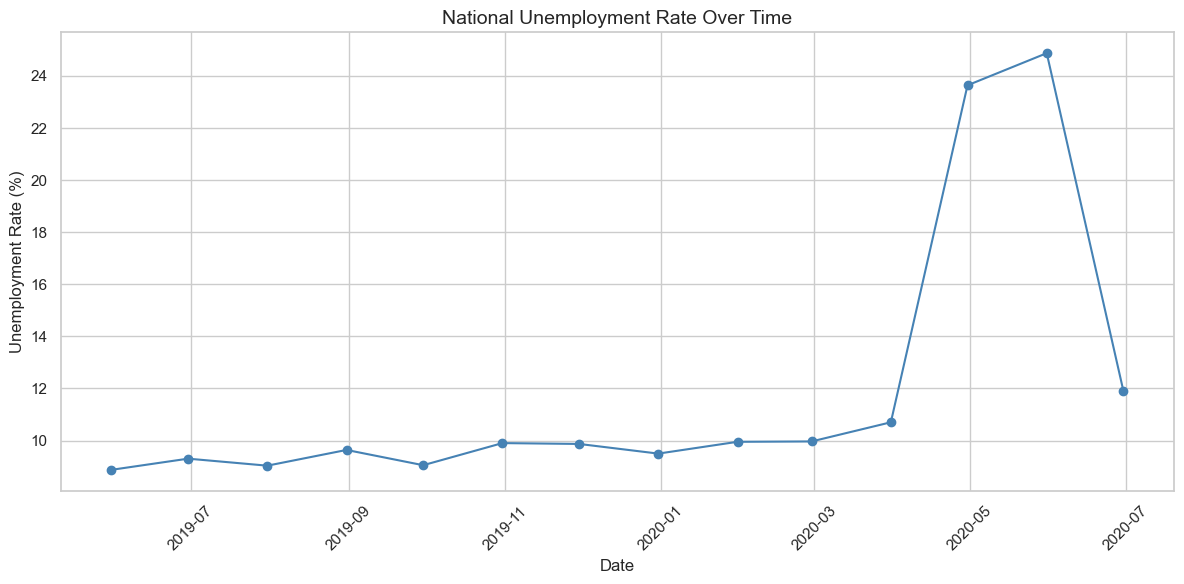

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# --- Line Chart: National Unemployment Rate Over Time ---
national_trend = df_cleaned.groupby('Date')['Estimated_Unemployment_Rate_(%)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(national_trend.index, national_trend.values, marker='o', color='steelblue')
plt.title('National Unemployment Rate Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

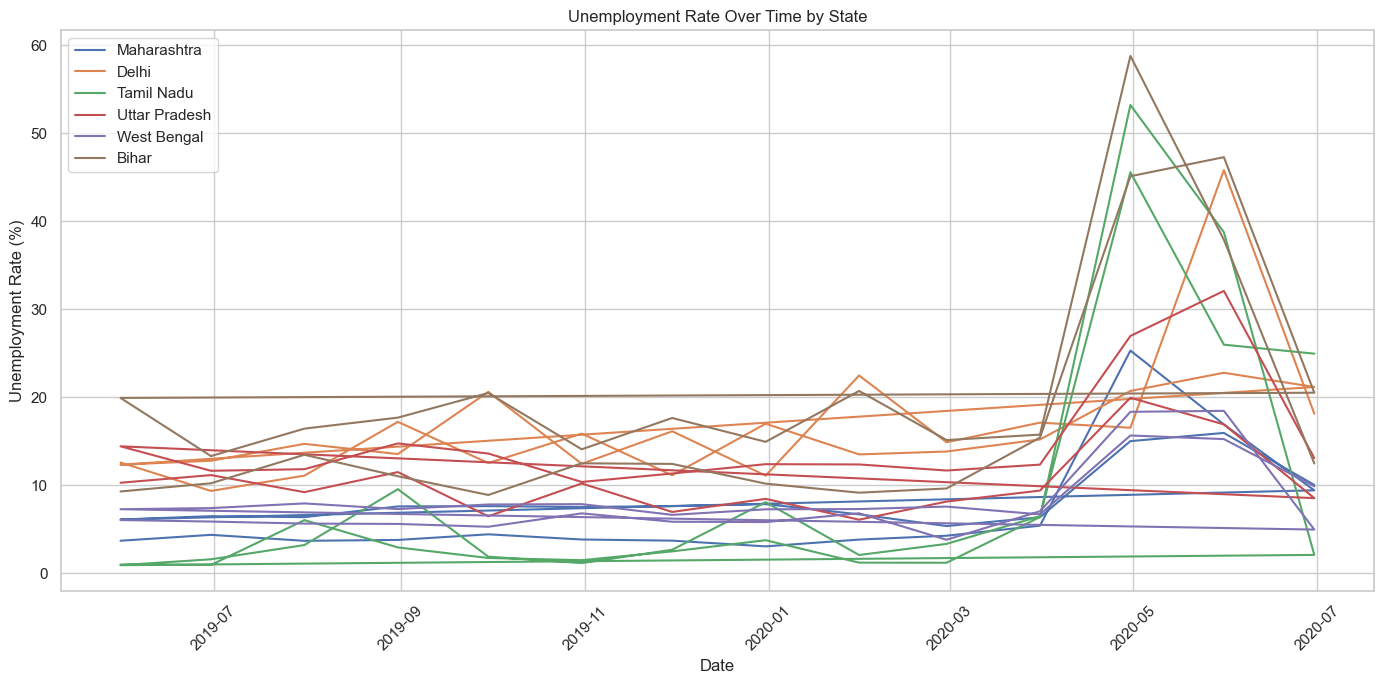

In [21]:
# Select a few major states for clarity
selected_states = ['Maharashtra', 'Delhi', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal','Bihar']
plt.figure(figsize=(14, 7))

for state in selected_states:
    state_data = df_cleaned[df_cleaned['Region'] == state]
    plt.plot(state_data['Date'], state_data['Estimated_Unemployment_Rate_(%)'], label=state)

plt.title('Unemployment Rate Over Time by State')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


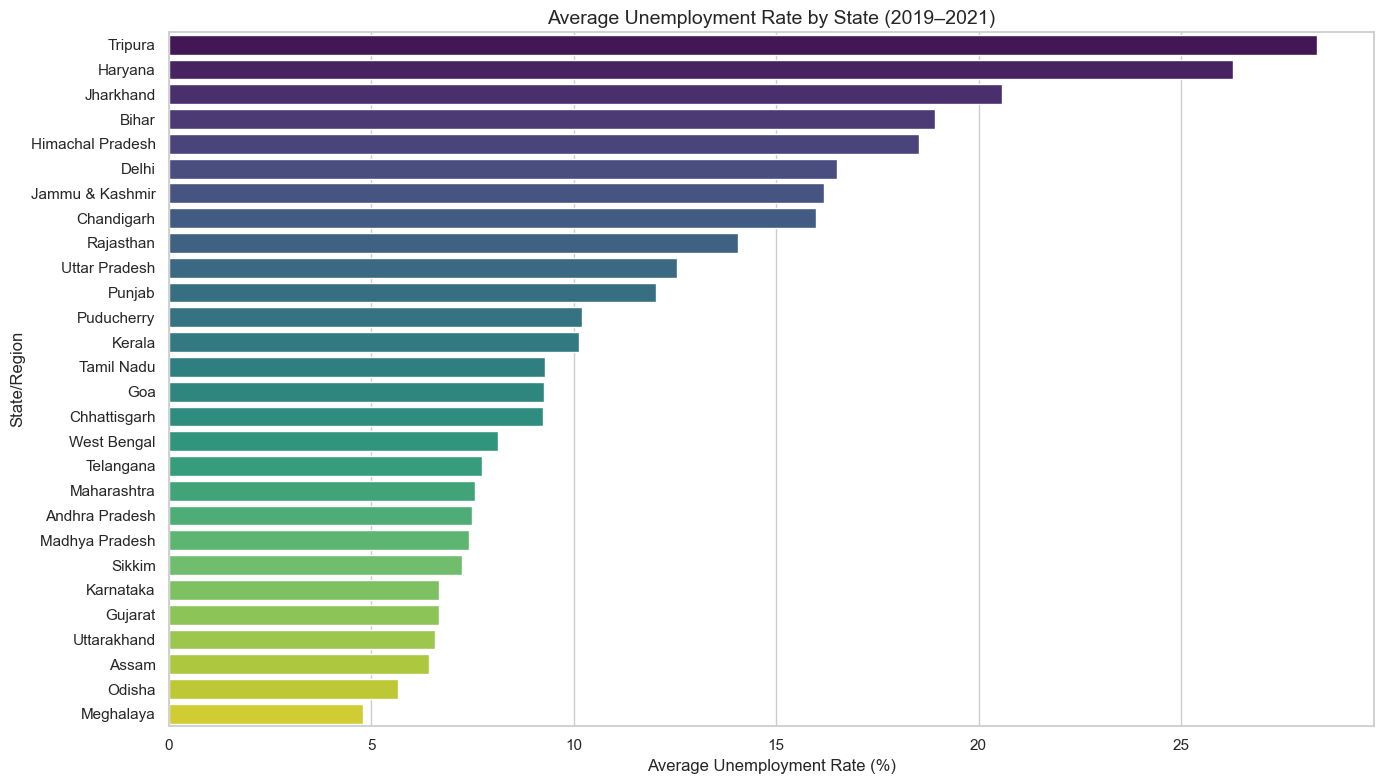

In [25]:

# Prepare the data as a DataFrame to use 'hue' properly
state_avg_df = state_avg_unemployment.reset_index()
state_avg_df.columns = ['Region', 'Average_Unemployment_Rate']

# Plot bar chart with hue assigned
plt.figure(figsize=(14, 8))
sns.barplot(
    data=state_avg_df,
    x='Average_Unemployment_Rate',
    y='Region',
    hue='Region',
    palette='viridis',
    legend=False
)

plt.title('Average Unemployment Rate by State (2019–2021)', fontsize=14)
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('State/Region')
plt.tight_layout()
plt.show()



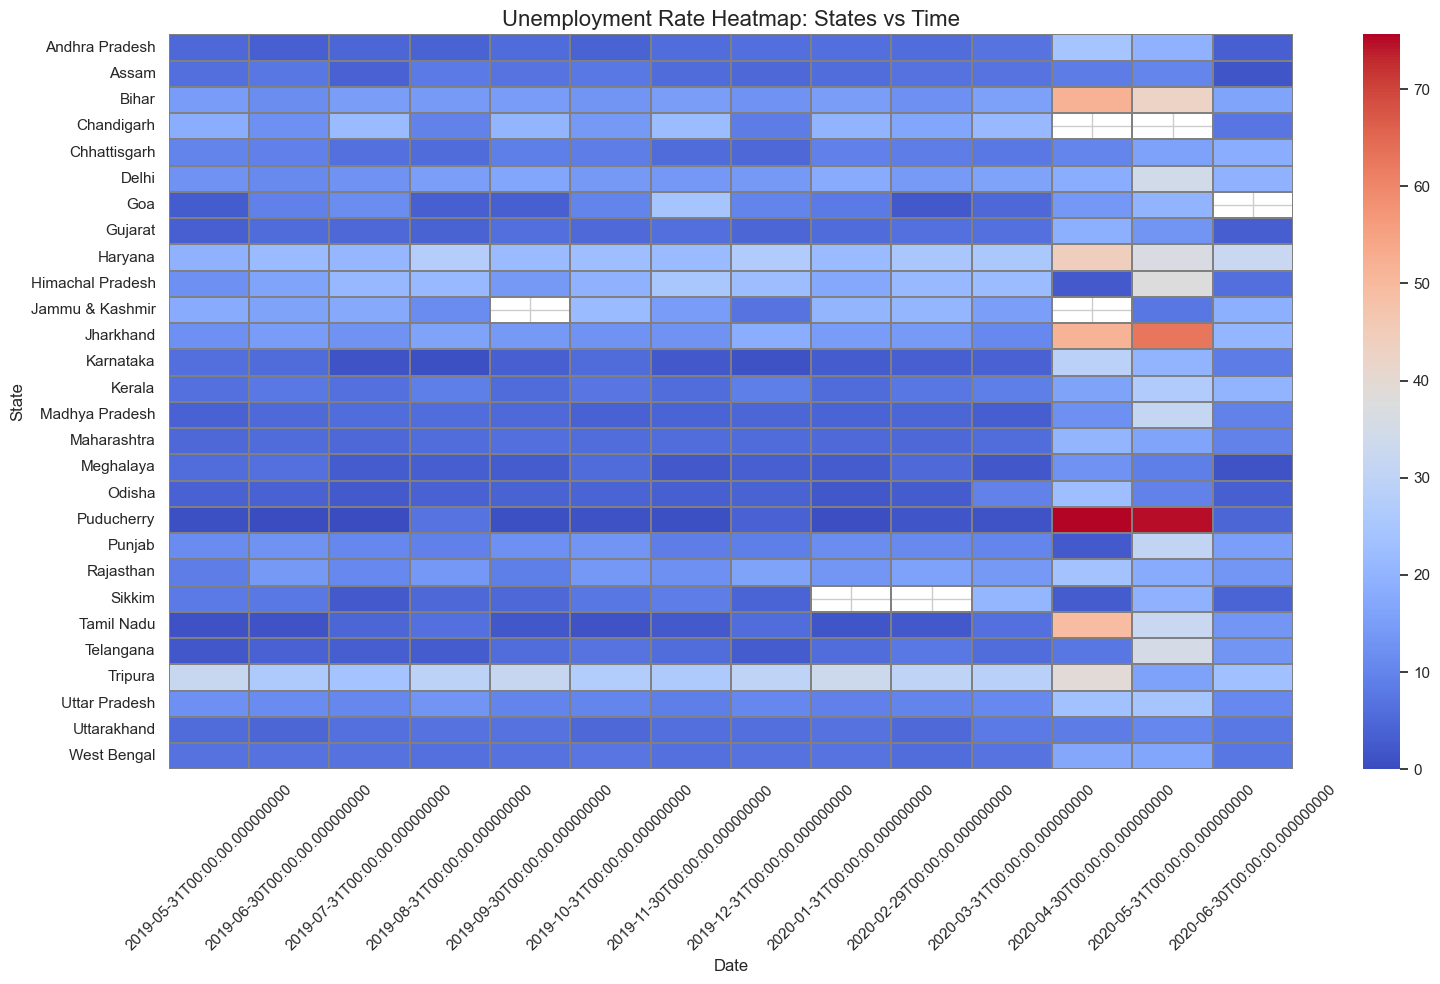

In [27]:
# Pivot table: States as rows, Dates as columns
heatmap_data = df_cleaned.pivot_table(
    index='Region',
    columns='Date',
    values='Estimated_Unemployment_Rate_(%)'
)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.3, linecolor='gray')
plt.title('Unemployment Rate Heatmap: States vs Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


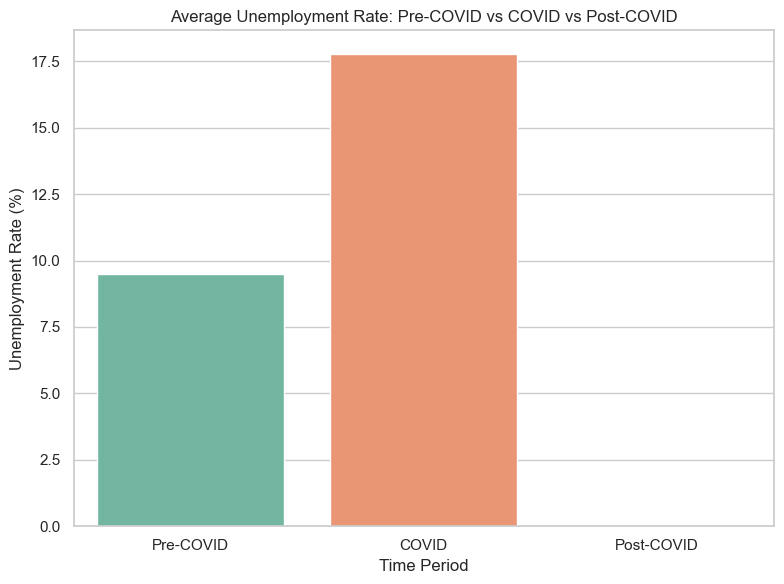

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert avg_rates dict into DataFrame
avg_rates_df = pd.DataFrame({
    'Period': list(avg_rates.keys()),
    'Unemployment Rate': list(avg_rates.values())
})

# Step 2: Plot bar chart with hue=x and legend disabled (removes warning)
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_rates_df, x='Period', y='Unemployment Rate', hue='Period', palette='Set2', legend=False)
plt.title('Average Unemployment Rate: Pre-COVID vs COVID vs Post-COVID')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Time Period')
plt.tight_layout()
plt.show()


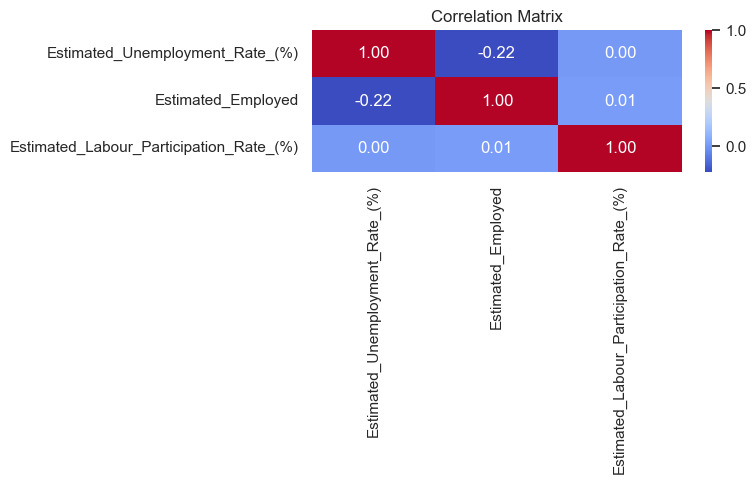

In [41]:
# Select relevant numeric columns
corr_df = df_cleaned[[
    'Estimated_Unemployment_Rate_(%)',
    'Estimated_Employed',
    'Estimated_Labour_Participation_Rate_(%)'
]]

# Compute correlation
correlation_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


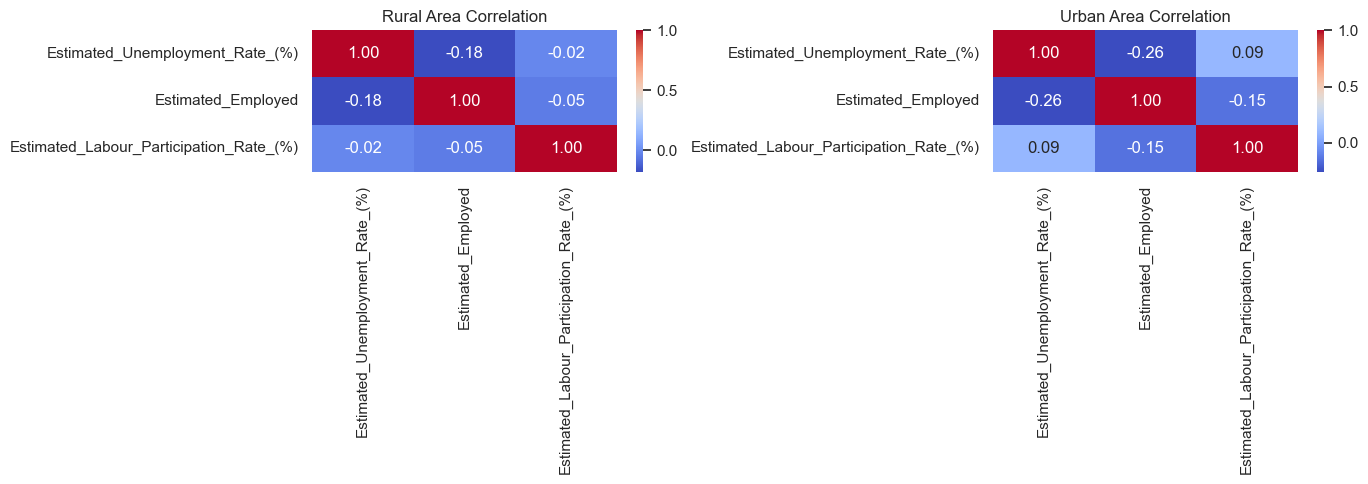

In [51]:
# Separate data
rural = df_cleaned[df_cleaned['Area'] == 'Rural']
urban = df_cleaned[df_cleaned['Area'] == 'Urban']

# Correlation: Rural
rural_corr = rural[[
    'Estimated_Unemployment_Rate_(%)',
    'Estimated_Employed',
    'Estimated_Labour_Participation_Rate_(%)'
]].corr()

# Correlation: Urban
urban_corr = urban[[
    'Estimated_Unemployment_Rate_(%)',
    'Estimated_Employed',
    'Estimated_Labour_Participation_Rate_(%)'
]].corr()

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(rural_corr, annot=True, cmap='coolwarm', ax=axes[0], fmt=".2f")
axes[0].set_title("Rural Area Correlation")

sns.heatmap(urban_corr, annot=True, cmap='coolwarm', ax=axes[1], fmt=".2f")
axes[1].set_title("Urban Area Correlation")

plt.tight_layout()
plt.show()


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Prepare features and target
data = df_cleaned.copy()

# Encode categorical variables
le_region = LabelEncoder()
le_area = LabelEncoder()

data['Region_encoded'] = le_region.fit_transform(data['Region'])
data['Area_encoded'] = le_area.fit_transform(data['Area'])

# Define X (features) and y (target)
X = data[['Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)', 'Region_encoded', 'Area_encoded']]
y = data['Estimated_Unemployment_Rate_(%)']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")


 RMSE: 11.74
 R² Score: 0.05


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


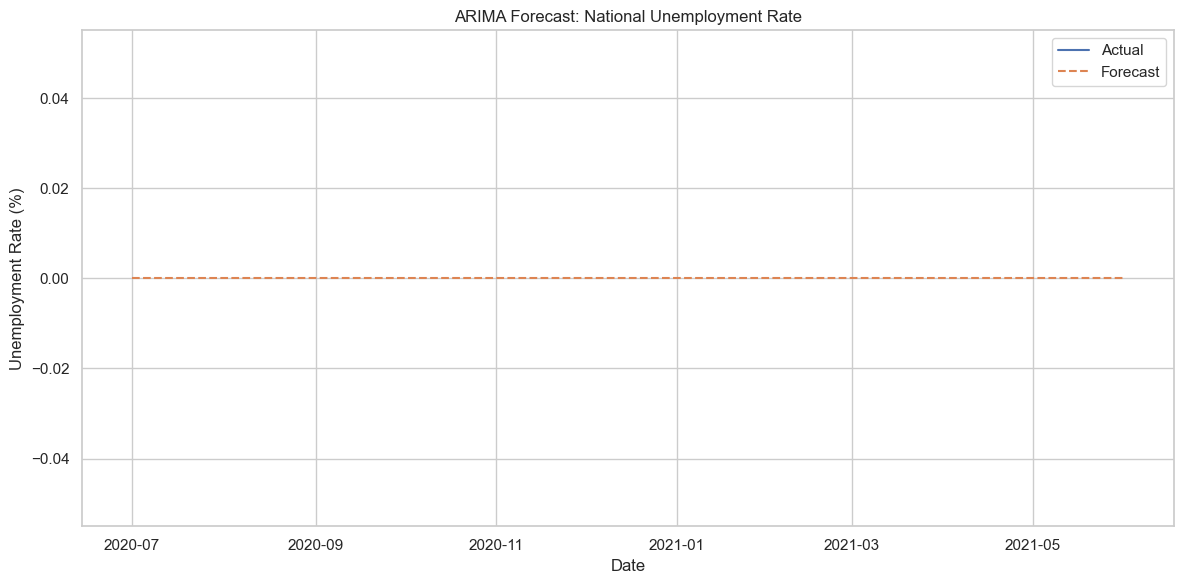

In [55]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Prepare time series
national_ts = df_cleaned.groupby('Date')['Estimated_Unemployment_Rate_(%)'].mean()
national_ts = national_ts.asfreq('MS')
national_ts = national_ts.interpolate()

# Fit ARIMA model (simple parameters for start)
model = ARIMA(national_ts, order=(2,1,2))  # AR(2), I(1), MA(2) – tuneable
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(national_ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(national_ts, label='Actual')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast: National Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


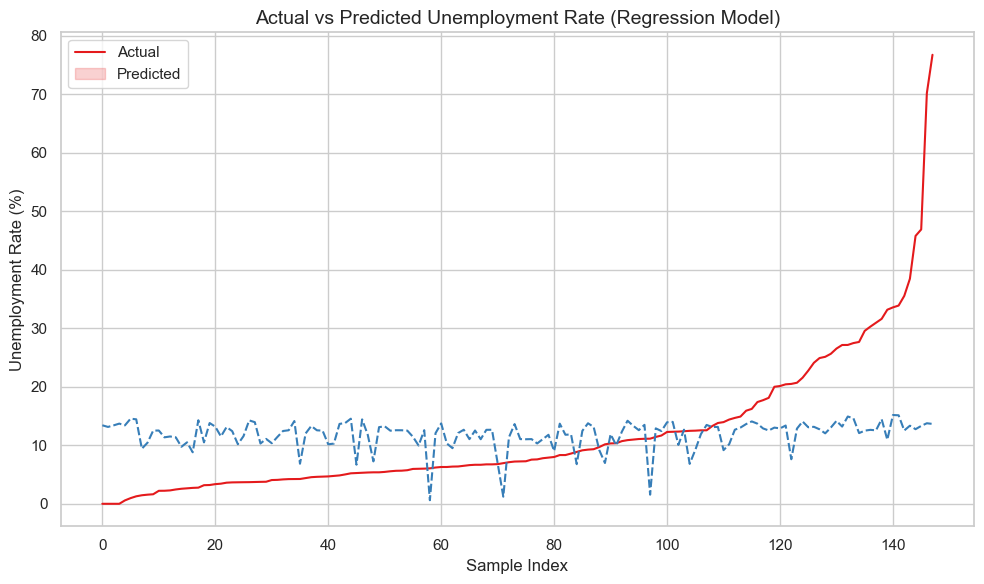

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure previous predictions are available (from linear regression model)
# y_test = actual values from test set
# y_pred = model's predicted values

# Convert to DataFrame for plotting
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Sort by actual values (optional for clearer line plot)
results_df = results_df.sort_values(by='Actual').reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, palette="Set1")
plt.title('Actual vs Predicted Unemployment Rate (Regression Model)', fontsize=14)
plt.xlabel('Sample Index')
plt.ylabel('Unemployment Rate (%)')
plt.legend(['Actual', 'Predicted'])
plt.grid(True)
plt.tight_layout()
plt.show()


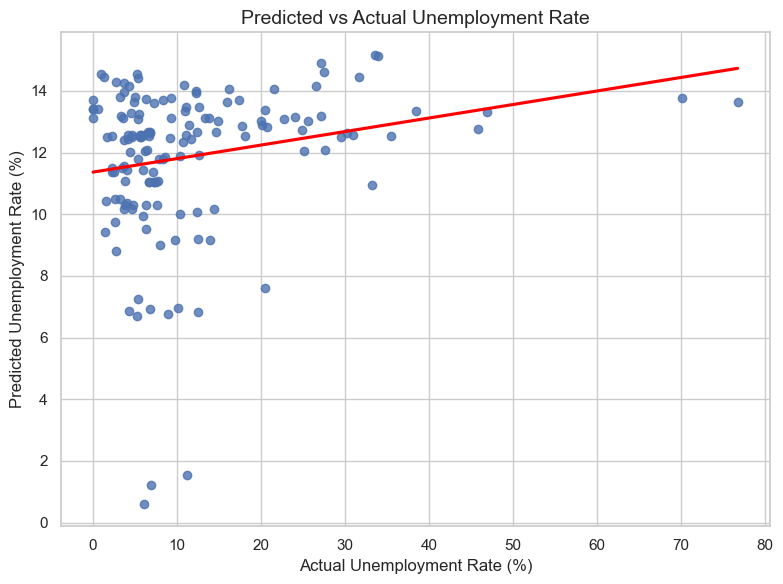

In [59]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})
plt.title('Predicted vs Actual Unemployment Rate', fontsize=14)
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
